# Take - Home Quiz 

#### Load Required Libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

#### Adjust plotting settings for better visualization.

In [18]:
plt.rcParams['figure.figsize'] = (16, 10)

In [7]:
data = pd.read_csv("housing_sampled.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7234600098,20140905T000000,552100.0,3,3.0,1330,1379,2.0,0,0,...,8,1120,210,2005,0,98122,47.6126,-122.313,1810,1770
1,4221250340,20150409T000000,625000.0,3,2.5,2280,4757,2.0,0,0,...,8,2280,0,2003,0,98075,47.5901,-122.018,2280,4534
2,546000820,20141110T000000,415000.0,2,1.0,980,4108,1.0,0,0,...,7,980,0,1947,0,98117,47.6870,-122.381,1500,4046
3,8682250330,20140624T000000,675000.0,3,3.5,2300,5611,1.0,0,0,...,8,2300,0,2004,0,98053,47.7122,-122.026,2170,5926
4,7579200600,20150428T000000,575000.0,3,2.0,1750,5750,1.0,0,2,...,7,870,880,1956,0,98116,47.5579,-122.384,1750,5750


#### Select Proposed Variables in the Instructions

In [60]:
df = data[['price','bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view']]
df.head(20)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view
0,231300.0,2,1.00,1180,1.0,0,0
1,538000.0,3,2.25,2570,2.0,0,0
2,180000.0,2,1.00,770,1.0,0,0
3,604000.0,4,3.00,1960,1.0,0,0
4,510000.0,3,2.00,1680,1.0,0,0
5,1225000.0,4,4.50,5420,1.0,0,0
6,257500.0,3,2.25,1715,2.0,0,0
7,291850.0,3,1.50,1060,1.0,0,0
8,229500.0,3,1.00,1780,1.0,0,0
9,323000.0,3,2.50,1890,2.0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   waterfront   21613 non-null  int64  
 6   view         21613 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


#### Create a scatterplot matrix to get general knowledge about variables.

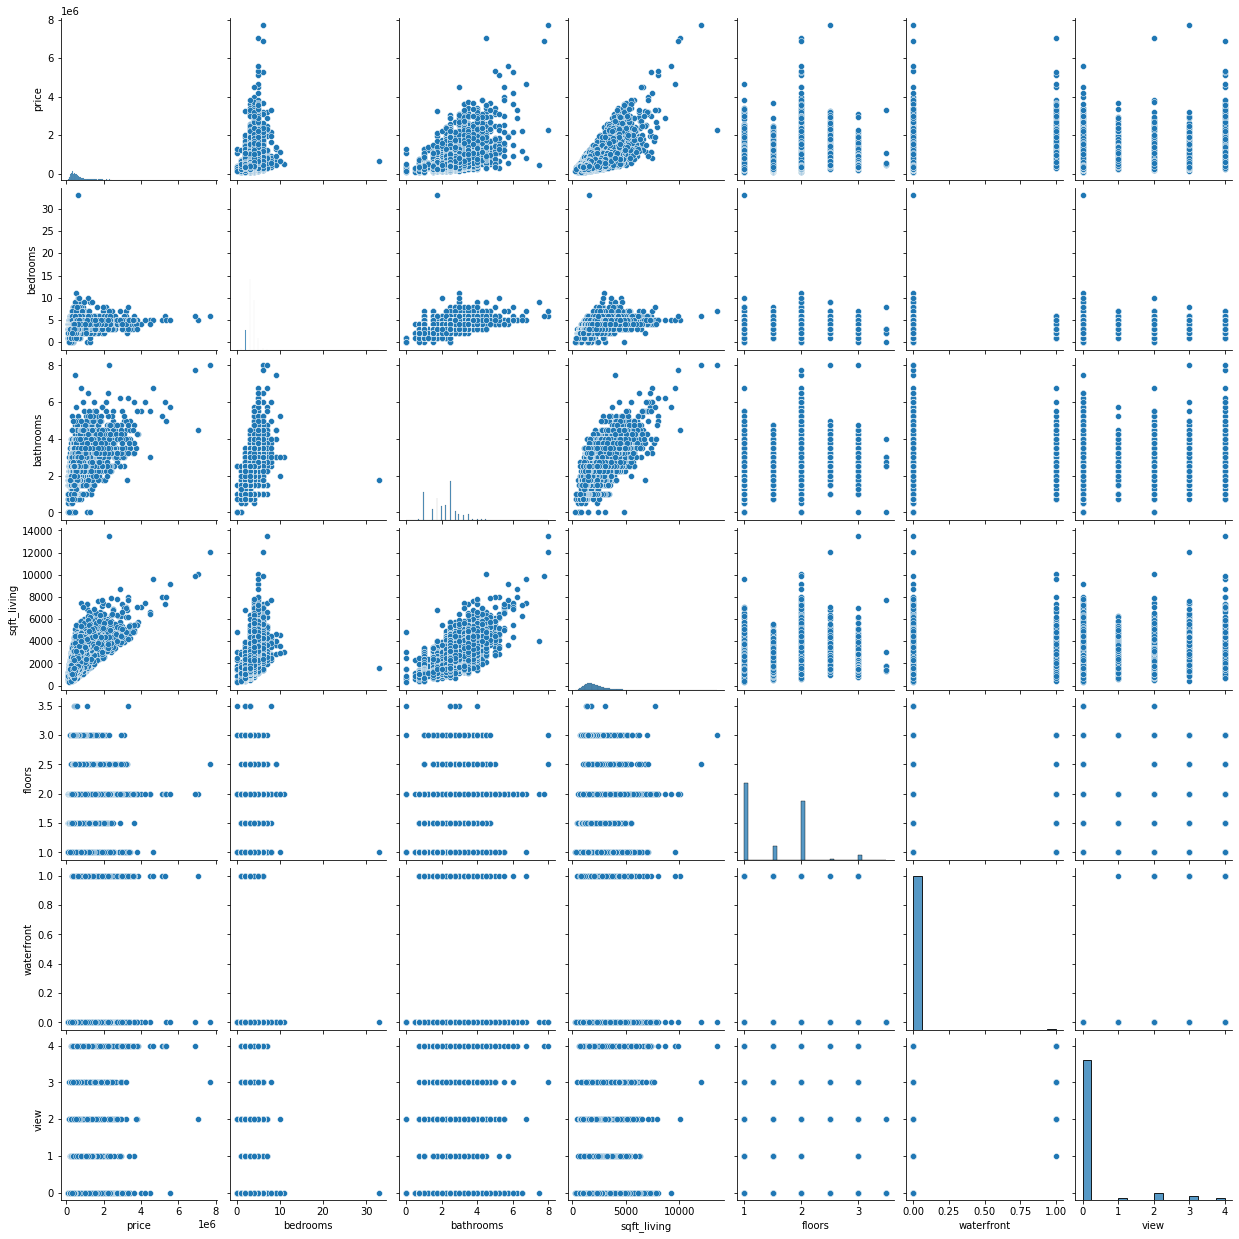

In [62]:
sns.pairplot(df)
plt.show()

#### It seems that we do not have normally distributed variables, but we do not rely on normality in ANN. However, there seems some variables are correlated.

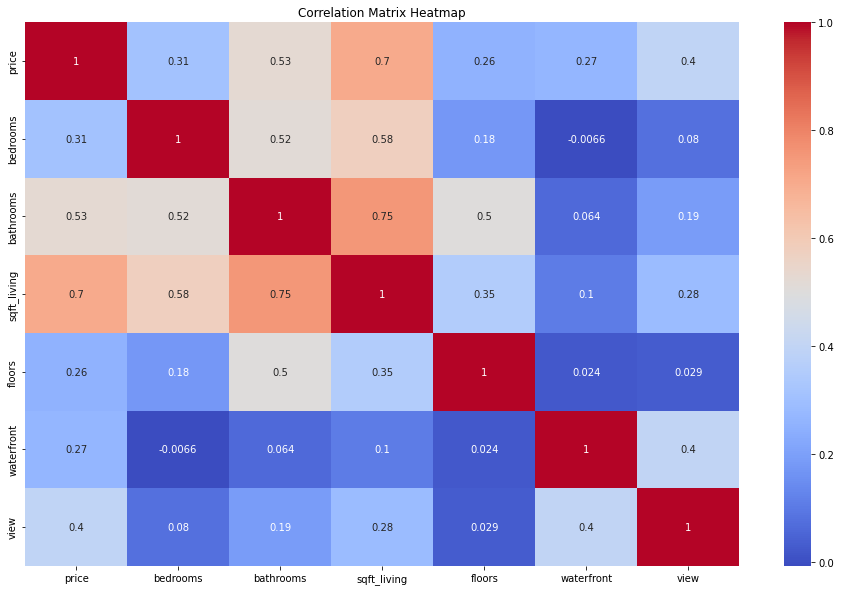

In [63]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

#### From correlation heatmap, we can also observe some slightly and highly correlated variables.

#### Now, one should apply min-max scaling before proceeding further. For this purpose, a function will be created.

In [31]:
def scaling_min_max(x): # Function for scaling
    return (x - x.min()) / (x.max() - x.min())

In [64]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400886e+05,3.370795,2.114757,2079.899736,1.494309,0.007542,0.234303
std,3.671268e+05,0.930105,0.770163,918.440897,0.539989,0.086517,0.766318
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000


#### Waterfront and view are categorical variables in here. So, using one-hot encoding might be beneficial. Just view is needed to be encoded, since waterfront is already in binary form.

In [65]:
df_encoded = pd.get_dummies(df, columns=['view'], drop_first=True, dtype = 'int')

In [66]:
df_encoded.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view_1,view_2,view_3,view_4
0,231300.0,2,1.00,1180,1.0,0,0,0,0,0
1,538000.0,3,2.25,2570,2.0,0,0,0,0,0
2,180000.0,2,1.00,770,1.0,0,0,0,0,0
3,604000.0,4,3.00,1960,1.0,0,0,0,0,0
4,510000.0,3,2.00,1680,1.0,0,0,0,0,0
5,1225000.0,4,4.50,5420,1.0,0,0,0,0,0
6,257500.0,3,2.25,1715,2.0,0,0,0,0,0
7,291850.0,3,1.50,1060,1.0,0,0,0,0,0
8,229500.0,3,1.00,1780,1.0,0,0,0,0,0
9,323000.0,3,2.50,1890,2.0,0,0,0,0,0


In [70]:
df_encoded[['price','bedrooms', 'bathrooms', 'sqft_living', 'floors']] = df_encoded[['price','bedrooms', 'bathrooms', 'sqft_living', 'floors']].apply(scaling_min_max) 
df_scaled = df_encoded.copy()

In [71]:
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view_1,view_2,view_3,view_4
0,0.020498,0.060606,0.12500,0.067170,0.0,0,0,0,0,0
1,0.060721,0.090909,0.28125,0.172075,0.4,0,0,0,0,0
2,0.013770,0.060606,0.12500,0.036226,0.0,0,0,0,0,0
3,0.069377,0.121212,0.37500,0.126038,0.0,0,0,0,0,0
4,0.057049,0.090909,0.25000,0.104906,0.0,0,0,0,0,0


In [72]:
df_scaled.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view_1,view_2,view_3,view_4
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.060995,0.102145,0.264345,0.135087,0.197724,0.007542,0.015361,0.044557,0.023597,0.014760
std,0.048148,0.028185,0.096270,0.069316,0.215996,0.086517,0.122987,0.206333,0.151793,0.120592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032387,0.090909,0.218750,0.085811,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.049180,0.090909,0.281250,0.122264,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.074754,0.121212,0.312500,0.170566,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### All numerical variables take places between 0 and 1.

#### Apply cross validation by using train-test split approach.

In [73]:
# For reproducability
np.random.seed(2001)

# Splitting the data
train_data, test_data = train_test_split(df_scaled, test_size=0.25, random_state=2001)
X_train = train_data.drop(columns="price")
y_train = train_data["price"]
X_test = test_data.drop(columns="price")
y_test = test_data["price"]


#### Before training, get initial weights for comparison after training.

In [87]:
model_inspect = Sequential() 
model_inspect.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))

model_inspect.compile(optimizer=Adam(), loss='mse') 

initial_weights = model_inspect.get_weights()

print("Initial Weights and Biases:")
for i, w in enumerate(initial_weights):
    print(f"Layer {i}: {w}")

Initial Weights and Biases:
Layer 0: [[ 0.13352978]
 [ 0.07366627]
 [ 0.23166645]
 [-0.25735706]
 [ 0.39071715]
 [-0.52944446]
 [ 0.47859204]
 [-0.34183794]
 [ 0.20468462]]
Layer 1: [0.]


### Model 1 : A simple ANN

In [85]:
model1 = Sequential()
model1.add(Dense(1, input_dim=X_train.shape[1], activation='linear'))

model1.compile(optimizer=Adam(), loss='mse')
model1.fit(X_train, y_train, epochs=300, verbose=0)

#### Predictions, SSE, RMSE and Hyperparameter for Initial Model (Model 1)

In [91]:
pred_train1 = model1.predict(X_train).flatten()
pred_test1 = model1.predict(X_test).flatten()

SSE_1_train = np.sum((y_train - pred_train1) ** 2) / 2
SSE_1_test = np.sum((y_test - pred_test1) ** 2) / 2

print("Model 1 - Train SSE:", SSE_1_train / len(y_train))
print("Model 1 - Test SSE:", SSE_1_test / len(y_test))

rmse_train = np.sqrt(mean_squared_error(y_train, pred_train1))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test1))

print("Model 1 - Train RMSE:", rmse_train)
print("Model 1 - Test RMSE:", rmse_test)

optimizer = model1.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

169/169 [==============================] - 0s 517us/step
Model 1 - Train SSE: 0.0005143201495336738
Model 1 - Test SSE: 0.0005009921318880215
Model 1 - Train RMSE: 0.03207242271901747
Model 1 - Test RMSE: 0.031654135018604486
Optimizer: Adam
Learning Rate: 0.001


#### As one may observe, averages are close to each other for both metrics. Morever, Test SSE-RMSE are slightly lower than Train SSE-RMSE; hence, one may conclude that one overfitting exists. 

### Model 2 = ANN Model with 3 hidden layers

In [93]:
model2 = Sequential()
model2.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(2, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model2.fit(X_train, y_train, epochs=300, verbose=1)

Epoch 1/300
507/507 [==============================] - 1s 830us/step - loss: 0.0014
Epoch 2/300
507/507 [==============================] - 0s 695us/step - loss: 0.0011
Epoch 3/300
507/507 [==============================] - 0s 716us/step - loss: 0.0010
Epoch 4/300
507/507 [==============================] - 0s 686us/step - loss: 0.0011
Epoch 5/300
507/507 [==============================] - 0s 791us/step - loss: 0.0010
Epoch 6/300
507/507 [==============================] - 0s 786us/step - loss: 0.0010
Epoch 7/300
507/507 [==============================] - 0s 735us/step - loss: 0.0010
Epoch 8/300
507/507 [==============================] - 0s 692us/step - loss: 0.0010
Epoch 9/300
507/507 [==============================] - 0s 702us/step - loss: 0.0010
Epoch 10/300
507/507 [==============================] - 0s 690us/step - loss: 0.0010
Epoch 11/300
507/507 [==============================] - 0s 740us/step - loss: 0.0010
Epoch 12/300
507/507 [==============================] - 0s 697us/step - lo

507/507 [==============================] - 0s 749us/step - loss: 0.0010
Epoch 97/300
507/507 [==============================] - 0s 711us/step - loss: 9.7796e-04
Epoch 98/300
507/507 [==============================] - 0s 723us/step - loss: 9.9043e-04
Epoch 99/300
507/507 [==============================] - 0s 761us/step - loss: 0.0010
Epoch 100/300
507/507 [==============================] - 0s 785us/step - loss: 0.0010
Epoch 101/300
507/507 [==============================] - 0s 853us/step - loss: 9.7017e-04
Epoch 102/300
507/507 [==============================] - 0s 861us/step - loss: 9.9915e-04
Epoch 103/300
507/507 [==============================] - 0s 675us/step - loss: 9.9840e-04
Epoch 104/300
507/507 [==============================] - 0s 693us/step - loss: 0.0010
Epoch 105/300
507/507 [==============================] - 0s 690us/step - loss: 0.0010
Epoch 106/300
507/507 [==============================] - 0s 747us/step - loss: 0.0010
Epoch 107/300
507/507 [============================

507/507 [==============================] - 0s 713us/step - loss: 0.0010
Epoch 189/300
507/507 [==============================] - 0s 761us/step - loss: 9.9902e-04
Epoch 190/300
507/507 [==============================] - 0s 811us/step - loss: 9.9053e-04
Epoch 191/300
507/507 [==============================] - 0s 757us/step - loss: 9.9381e-04
Epoch 192/300
507/507 [==============================] - 0s 782us/step - loss: 9.8713e-04
Epoch 193/300
507/507 [==============================] - 0s 797us/step - loss: 9.9913e-04
Epoch 194/300
507/507 [==============================] - 0s 682us/step - loss: 0.0010
Epoch 195/300
507/507 [==============================] - 0s 795us/step - loss: 0.0010
Epoch 196/300
507/507 [==============================] - 0s 784us/step - loss: 0.0010
Epoch 197/300
507/507 [==============================] - 0s 744us/step - loss: 9.8076e-04
Epoch 198/300
507/507 [==============================] - 0s 783us/step - loss: 0.0010
Epoch 199/300
507/507 [=====================

507/507 [==============================] - 0s 660us/step - loss: 9.7690e-04
Epoch 281/300
507/507 [==============================] - 0s 667us/step - loss: 9.9284e-04
Epoch 282/300
507/507 [==============================] - 0s 684us/step - loss: 0.0010
Epoch 283/300
507/507 [==============================] - 0s 670us/step - loss: 0.0010
Epoch 284/300
507/507 [==============================] - 0s 663us/step - loss: 9.9439e-04
Epoch 285/300
507/507 [==============================] - 0s 695us/step - loss: 0.0010
Epoch 286/300
507/507 [==============================] - 0s 788us/step - loss: 9.9468e-04
Epoch 287/300
507/507 [==============================] - 0s 738us/step - loss: 0.0010
Epoch 288/300
507/507 [==============================] - 0s 674us/step - loss: 9.9058e-04
Epoch 289/300
507/507 [==============================] - 0s 666us/step - loss: 9.8875e-04
Epoch 290/300
507/507 [==============================] - 0s 700us/step - loss: 9.8745e-04
Epoch 291/300
507/507 [=================

#### Predictions, SSE, RMSE and Hyperparameter for Model 2

In [94]:
pred_train2 = model2.predict(X_train).flatten()
pred_test2 = model2.predict(X_test).flatten()

SSE_2_train = np.sum((y_train - pred_train2) ** 2) / 2
SSE_2_test = np.sum((y_test - pred_test2) ** 2) / 2

print("Model 2 - Train SSE:", SSE_2_train / len(y_train))
print("Model 2 - Test SSE:", SSE_2_test / len(y_test))

rmse2_train = np.sqrt(mean_squared_error(y_train, pred_train2))
rmse2_test = np.sqrt(mean_squared_error(y_test, pred_test2))

print("Model 1 - Train RMSE:", rmse2_train)
print("Model 1 - Test RMSE:", rmse2_test)

optimizer = model2.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

169/169 [==============================] - 0s 578us/step
Model 2 - Train SSE: 0.0004648061263371472
Model 2 - Test SSE: 0.00046714061539718227
Model 1 - Train RMSE: 0.0304895433333183
Model 1 - Test RMSE: 0.030566014309922132
Optimizer: Adam
Learning Rate: 0.001


### Model 3: ANN with 5-5 neurons in 2 layers

In [96]:
model3 = Sequential()
model3.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(5, activation='relu'))
model3.add(Dense(1, activation='linear'))

model3.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
%time model3.fit(X_train, y_train, epochs=300, verbose=1)

Epoch 1/300
507/507 [==============================] - 1s 662us/step - loss: 0.0015
Epoch 2/300
507/507 [==============================] - 0s 675us/step - loss: 0.0011
Epoch 3/300
507/507 [==============================] - 0s 658us/step - loss: 0.0011
Epoch 4/300
507/507 [==============================] - 0s 654us/step - loss: 0.0011
Epoch 5/300
507/507 [==============================] - 0s 667us/step - loss: 0.0010
Epoch 6/300
507/507 [==============================] - 0s 653us/step - loss: 0.0010
Epoch 7/300
507/507 [==============================] - 0s 651us/step - loss: 0.0011
Epoch 8/300
507/507 [==============================] - 0s 657us/step - loss: 0.0011
Epoch 9/300
507/507 [==============================] - 0s 662us/step - loss: 0.0010
Epoch 10/300
507/507 [==============================] - 0s 649us/step - loss: 0.0010
Epoch 11/300
507/507 [==============================] - 0s 649us/step - loss: 0.0011
Epoch 12/300
507/507 [==============================] - 0s 644us/step - lo

507/507 [==============================] - 0s 815us/step - loss: 0.0010
Epoch 97/300
507/507 [==============================] - 0s 856us/step - loss: 9.9559e-04
Epoch 98/300
507/507 [==============================] - 0s 803us/step - loss: 9.9693e-04
Epoch 99/300
507/507 [==============================] - 0s 868us/step - loss: 0.0010
Epoch 100/300
507/507 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 101/300
507/507 [==============================] - 0s 886us/step - loss: 9.6876e-04
Epoch 102/300
507/507 [==============================] - 0s 908us/step - loss: 9.9691e-04
Epoch 103/300
507/507 [==============================] - 0s 773us/step - loss: 0.0010
Epoch 104/300
507/507 [==============================] - 0s 832us/step - loss: 0.0010
Epoch 105/300
507/507 [==============================] - 1s 987us/step - loss: 0.0010
Epoch 106/300
507/507 [==============================] - 0s 777us/step - loss: 0.0010
Epoch 107/300
507/507 [==============================] - 

507/507 [==============================] - 0s 662us/step - loss: 9.7601e-04
Epoch 189/300
507/507 [==============================] - 0s 663us/step - loss: 9.6626e-04
Epoch 190/300
507/507 [==============================] - 0s 656us/step - loss: 9.6079e-04
Epoch 191/300
507/507 [==============================] - 0s 662us/step - loss: 9.7024e-04
Epoch 192/300
507/507 [==============================] - 0s 664us/step - loss: 9.6082e-04
Epoch 193/300
507/507 [==============================] - 0s 652us/step - loss: 9.8075e-04
Epoch 194/300
507/507 [==============================] - 0s 712us/step - loss: 9.8100e-04
Epoch 195/300
507/507 [==============================] - 0s 733us/step - loss: 9.7491e-04
Epoch 196/300
507/507 [==============================] - 0s 665us/step - loss: 9.7197e-04
Epoch 197/300
507/507 [==============================] - 0s 759us/step - loss: 9.7716e-04
Epoch 198/300
507/507 [==============================] - 0s 677us/step - loss: 9.7544e-04
Epoch 199/300
507/507 [=

Epoch 280/300
507/507 [==============================] - 0s 738us/step - loss: 9.6419e-04
Epoch 281/300
507/507 [==============================] - 0s 799us/step - loss: 9.8433e-04
Epoch 282/300
507/507 [==============================] - 0s 644us/step - loss: 0.0010
Epoch 283/300
507/507 [==============================] - 0s 654us/step - loss: 9.7249e-04
Epoch 284/300
507/507 [==============================] - 0s 664us/step - loss: 9.6376e-04
Epoch 285/300
507/507 [==============================] - 0s 660us/step - loss: 0.0010
Epoch 286/300
507/507 [==============================] - 0s 654us/step - loss: 9.5973e-04
Epoch 287/300
507/507 [==============================] - 0s 645us/step - loss: 9.6752e-04
Epoch 288/300
507/507 [==============================] - 0s 646us/step - loss: 9.6732e-04
Epoch 289/300
507/507 [==============================] - 0s 643us/step - loss: 9.6404e-04
Epoch 290/300
507/507 [==============================] - 0s 655us/step - loss: 9.6820e-04
Epoch 291/300
507/

#### Predictions, SSE, RMSE and Hyperparameter for Model 3

In [100]:
pred_train3 = model3.predict(X_train).flatten()
pred_test3 = model3.predict(X_test).flatten()

SSE_3_train = np.sum((y_train - pred_train3) ** 2) / 2
SSE_3_test = np.sum((y_test - pred_test3) ** 2) / 2

print("Model 3 - Train SSE:", SSE_3_train / len(y_train))
print("Model 3 - Test SSE:", SSE_3_test / len(y_test))

rmse3_train = np.sqrt(mean_squared_error(y_train, pred_train3))
rmse3_test = np.sqrt(mean_squared_error(y_test, pred_test3))

print("Model 3 - Train RMSE:", rmse3_train)
print("Model 3 - Test RMSE:", rmse3_test)

optimizer = model3.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

169/169 [==============================] - 0s 546us/step
Model 3 - Train SSE: 0.0004688035811545708
Model 3 - Test SSE: 0.0004759580359364467
Model 3 - Train RMSE: 0.030620371687965213
Model 3 - Test RMSE: 0.03085313714799345
Optimizer: Adam
Learning Rate: 0.01


### Model 4 : 5–3 layout with 2 hidden layers

In [98]:
model4 = Sequential()
model4.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model4.add(Dense(3, activation='relu'))
model4.add(Dense(1, activation='linear'))

model4.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
%time model4.fit(X_train, y_train, epochs=300, verbose=1)

Epoch 1/300
507/507 [==============================] - 1s 673us/step - loss: 0.0019
Epoch 2/300
507/507 [==============================] - 0s 662us/step - loss: 0.0011
Epoch 3/300
507/507 [==============================] - 0s 668us/step - loss: 0.0011
Epoch 4/300
507/507 [==============================] - 3s 7ms/step - loss: 0.0010
Epoch 5/300
507/507 [==============================] - 0s 677us/step - loss: 0.0011
Epoch 6/300
507/507 [==============================] - 0s 730us/step - loss: 0.0010
Epoch 7/300
507/507 [==============================] - 0s 644us/step - loss: 0.0010
Epoch 8/300
507/507 [==============================] - 0s 638us/step - loss: 0.0010
Epoch 9/300
507/507 [==============================] - 0s 641us/step - loss: 0.0010
Epoch 10/300
507/507 [==============================] - 0s 697us/step - loss: 0.0010
Epoch 11/300
507/507 [==============================] - 0s 676us/step - loss: 0.0010
Epoch 12/300
507/507 [==============================] - 0s 658us/step - loss

507/507 [==============================] - 0s 791us/step - loss: 9.9330e-04
Epoch 96/300
507/507 [==============================] - 0s 824us/step - loss: 9.9077e-04
Epoch 97/300
507/507 [==============================] - 0s 679us/step - loss: 9.8735e-04
Epoch 98/300
507/507 [==============================] - 0s 674us/step - loss: 9.9970e-04
Epoch 99/300
507/507 [==============================] - 0s 649us/step - loss: 0.0010
Epoch 100/300
507/507 [==============================] - 0s 682us/step - loss: 9.9287e-04
Epoch 101/300
507/507 [==============================] - 0s 667us/step - loss: 9.9702e-04
Epoch 102/300
507/507 [==============================] - 0s 654us/step - loss: 9.9398e-04
Epoch 103/300
507/507 [==============================] - 0s 660us/step - loss: 9.8362e-04
Epoch 104/300
507/507 [==============================] - 0s 673us/step - loss: 9.8351e-04
Epoch 105/300
507/507 [==============================] - 0s 748us/step - loss: 0.0010
Epoch 106/300
507/507 [=============

507/507 [==============================] - 0s 696us/step - loss: 0.0010
Epoch 188/300
507/507 [==============================] - 0s 637us/step - loss: 9.9223e-04
Epoch 189/300
507/507 [==============================] - 0s 808us/step - loss: 0.0010
Epoch 190/300
507/507 [==============================] - 0s 772us/step - loss: 9.8266e-04
Epoch 191/300
507/507 [==============================] - 0s 689us/step - loss: 0.0010
Epoch 192/300
507/507 [==============================] - 0s 648us/step - loss: 9.8781e-04
Epoch 193/300
507/507 [==============================] - 0s 766us/step - loss: 9.8255e-04
Epoch 194/300
507/507 [==============================] - 0s 654us/step - loss: 9.9275e-04
Epoch 195/300
507/507 [==============================] - 0s 702us/step - loss: 9.7690e-04
Epoch 196/300
507/507 [==============================] - 0s 810us/step - loss: 0.0010
Epoch 197/300
507/507 [==============================] - 0s 847us/step - loss: 0.0010
Epoch 198/300
507/507 [=====================

507/507 [==============================] - 0s 799us/step - loss: 0.0010
Epoch 280/300
507/507 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 281/300
507/507 [==============================] - 0s 712us/step - loss: 9.9307e-04
Epoch 282/300
507/507 [==============================] - 0s 705us/step - loss: 9.8399e-04
Epoch 283/300
507/507 [==============================] - 0s 871us/step - loss: 0.0010
Epoch 284/300
507/507 [==============================] - 0s 783us/step - loss: 9.8526e-04
Epoch 285/300
507/507 [==============================] - 0s 716us/step - loss: 9.8177e-04
Epoch 286/300
507/507 [==============================] - 0s 844us/step - loss: 9.9473e-04
Epoch 287/300
507/507 [==============================] - 0s 692us/step - loss: 9.9794e-04
Epoch 288/300
507/507 [==============================] - 0s 688us/step - loss: 9.8444e-04
Epoch 289/300
507/507 [==============================] - 0s 741us/step - loss: 9.8855e-04
Epoch 290/300
507/507 [===============

#### Predictions, SSE, RMSE and Hyperparameter for Model 4

In [102]:
pred_train4 = model4.predict(X_train).flatten()
pred_test4 = model4.predict(X_test).flatten()

SSE_4_train = np.sum((y_train - pred_train3) ** 2) / 2
SSE_4_test = np.sum((y_test - pred_test3) ** 2) / 2

print("Model 4 - Train SSE:", SSE_4_train / len(y_train))
print("Model 4 - Test SSE:", SSE_4_test / len(y_test))

rmse4_train = np.sqrt(mean_squared_error(y_train, pred_train4))
rmse4_test = np.sqrt(mean_squared_error(y_test, pred_test4))

print("Model 4 - Train RMSE:", rmse4_train)
print("Model 4 - Test RMSE:", rmse4_test)

optimizer = model4.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

169/169 [==============================] - 0s 551us/step
Model 4 - Train SSE: 0.0004688035811545708
Model 4 - Test SSE: 0.0004759580359364467
Model 4 - Train RMSE: 0.03056841266561195
Model 4 - Test RMSE: 0.03022717987149887
Optimizer: Adam
Learning Rate: 0.01


### Model 5 : 2 hidden layers of 5-3 layout with adjusted learning rate, epoch and batch size

In [108]:
model5 = Sequential()
model5.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model5.add(Dense(3, activation='relu'))
model5.add(Dense(1, activation='linear'))

model5.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

%time model4.fit(X_train, y_train, epochs=500, batch_size=128,verbose=1)

Epoch 1/500
127/127 [==============================] - 0s 703us/step - loss: 9.4919e-04
Epoch 2/500
127/127 [==============================] - 0s 676us/step - loss: 9.3650e-04
Epoch 3/500
127/127 [==============================] - 0s 696us/step - loss: 9.3849e-04
Epoch 4/500
127/127 [==============================] - 0s 720us/step - loss: 9.3560e-04
Epoch 5/500
127/127 [==============================] - 0s 728us/step - loss: 9.5140e-04
Epoch 6/500
127/127 [==============================] - 0s 740us/step - loss: 9.2728e-04
Epoch 7/500
127/127 [==============================] - 0s 856us/step - loss: 9.5283e-04
Epoch 8/500
127/127 [==============================] - 0s 760us/step - loss: 9.4201e-04
Epoch 9/500
127/127 [==============================] - 0s 723us/step - loss: 9.4101e-04
Epoch 10/500
127/127 [==============================] - 0s 812us/step - loss: 9.3813e-04
Epoch 11/500
127/127 [==============================] - 0s 723us/step - loss: 9.5235e-04
Epoch 12/500
127/127 [========

127/127 [==============================] - 0s 704us/step - loss: 9.5893e-04
Epoch 94/500
127/127 [==============================] - 0s 663us/step - loss: 9.5632e-04
Epoch 95/500
127/127 [==============================] - 0s 678us/step - loss: 9.4422e-04
Epoch 96/500
127/127 [==============================] - 0s 682us/step - loss: 9.3599e-04
Epoch 97/500
127/127 [==============================] - 0s 672us/step - loss: 9.5104e-04
Epoch 98/500
127/127 [==============================] - 0s 671us/step - loss: 9.4363e-04
Epoch 99/500
127/127 [==============================] - 0s 684us/step - loss: 9.5338e-04
Epoch 100/500
127/127 [==============================] - 0s 729us/step - loss: 9.4217e-04
Epoch 101/500
127/127 [==============================] - 0s 683us/step - loss: 9.4109e-04
Epoch 102/500
127/127 [==============================] - 0s 709us/step - loss: 9.6537e-04
Epoch 103/500
127/127 [==============================] - 0s 689us/step - loss: 9.7256e-04
Epoch 104/500
127/127 [=======

127/127 [==============================] - 0s 716us/step - loss: 9.5725e-04
Epoch 185/500
127/127 [==============================] - 0s 673us/step - loss: 9.5040e-04
Epoch 186/500
127/127 [==============================] - 0s 664us/step - loss: 9.3921e-04
Epoch 187/500
127/127 [==============================] - 0s 670us/step - loss: 9.5297e-04
Epoch 188/500
127/127 [==============================] - 0s 671us/step - loss: 9.5228e-04
Epoch 189/500
127/127 [==============================] - 0s 705us/step - loss: 9.3997e-04
Epoch 190/500
127/127 [==============================] - 0s 711us/step - loss: 9.6026e-04
Epoch 191/500
127/127 [==============================] - 0s 708us/step - loss: 9.6367e-04
Epoch 192/500
127/127 [==============================] - 0s 702us/step - loss: 9.6104e-04
Epoch 193/500
127/127 [==============================] - 0s 680us/step - loss: 9.3812e-04
Epoch 194/500
127/127 [==============================] - 0s 680us/step - loss: 9.6575e-04
Epoch 195/500
127/127 [=

127/127 [==============================] - 0s 849us/step - loss: 9.6162e-04
Epoch 276/500
127/127 [==============================] - 0s 730us/step - loss: 9.5123e-04
Epoch 277/500
127/127 [==============================] - 0s 819us/step - loss: 9.4233e-04
Epoch 278/500
127/127 [==============================] - 0s 852us/step - loss: 9.4486e-04
Epoch 279/500
127/127 [==============================] - 0s 861us/step - loss: 9.6831e-04
Epoch 280/500
127/127 [==============================] - 0s 819us/step - loss: 9.5137e-04
Epoch 281/500
127/127 [==============================] - 0s 833us/step - loss: 9.6377e-04
Epoch 282/500
127/127 [==============================] - 0s 793us/step - loss: 9.4282e-04
Epoch 283/500
127/127 [==============================] - 0s 687us/step - loss: 9.5123e-04
Epoch 284/500
127/127 [==============================] - 0s 701us/step - loss: 9.5525e-04
Epoch 285/500
127/127 [==============================] - 0s 668us/step - loss: 9.5965e-04
Epoch 286/500
127/127 [=

127/127 [==============================] - 0s 739us/step - loss: 9.4305e-04
Epoch 367/500
127/127 [==============================] - 0s 667us/step - loss: 9.4337e-04
Epoch 368/500
127/127 [==============================] - 0s 676us/step - loss: 9.6166e-04
Epoch 369/500
127/127 [==============================] - 0s 673us/step - loss: 9.5396e-04
Epoch 370/500
127/127 [==============================] - 0s 719us/step - loss: 9.5219e-04
Epoch 371/500
127/127 [==============================] - 0s 676us/step - loss: 9.5132e-04
Epoch 372/500
127/127 [==============================] - 0s 676us/step - loss: 9.4636e-04
Epoch 373/500
127/127 [==============================] - 0s 682us/step - loss: 9.4112e-04
Epoch 374/500
127/127 [==============================] - 0s 674us/step - loss: 9.4636e-04
Epoch 375/500
127/127 [==============================] - 0s 698us/step - loss: 9.4404e-04
Epoch 376/500
127/127 [==============================] - 0s 666us/step - loss: 9.4262e-04
Epoch 377/500
127/127 [=

127/127 [==============================] - 0s 824us/step - loss: 9.5387e-04
Epoch 458/500
127/127 [==============================] - 0s 682us/step - loss: 9.6120e-04
Epoch 459/500
127/127 [==============================] - 0s 681us/step - loss: 9.5329e-04
Epoch 460/500
127/127 [==============================] - 0s 695us/step - loss: 9.6032e-04
Epoch 461/500
127/127 [==============================] - 0s 677us/step - loss: 9.4542e-04
Epoch 462/500
127/127 [==============================] - 0s 684us/step - loss: 9.4806e-04
Epoch 463/500
127/127 [==============================] - 0s 681us/step - loss: 9.4142e-04
Epoch 464/500
127/127 [==============================] - 0s 671us/step - loss: 9.5020e-04
Epoch 465/500
127/127 [==============================] - 0s 681us/step - loss: 9.6810e-04
Epoch 466/500
127/127 [==============================] - 0s 698us/step - loss: 9.5281e-04
Epoch 467/500
127/127 [==============================] - 0s 739us/step - loss: 9.3649e-04
Epoch 468/500
127/127 [=

#### Predictions, SSE, RMSE and Hyperparameter for Model 5

In [109]:
pred_train5 = model5.predict(X_train).flatten()
pred_test5 = model5.predict(X_test).flatten()

SSE_5_train = np.sum((y_train - pred_train5) ** 2) / 2
SSE_5_test = np.sum((y_test - pred_test5) ** 2) / 2

print("Model 5 - Train SSE:", SSE_5_train / len(y_train))
print("Model 5 - Test SSE:", SSE_5_test / len(y_test))

rmse5_train = np.sqrt(mean_squared_error(y_train, pred_train5))
rmse5_test = np.sqrt(mean_squared_error(y_test, pred_test5))

print("Model 5 - Train RMSE:", rmse5_train)
print("Model 5 - Test RMSE:", rmse5_test)

optimizer = model5.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

169/169 [==============================] - 0s 552us/step
Model 5 - Train SSE: 0.0048531017816516395
Model 5 - Test SSE: 0.004458470123178053
Model 5 - Train RMSE: 0.0985200668052112
Model 5 - Test RMSE: 0.09442955176403256
Optimizer: Adam
Learning Rate: 0.001


### Model 6 : ANN of 8-4 layout with 2 layers, hyperbolic tangent activation and glorot uniform initializer

In [112]:
model_tanh = Sequential()
model_tanh.add(Dense(8, 
                     input_dim=X_train.shape[1], 
                     activation='tanh', 
                     kernel_initializer='glorot_uniform'))
model_tanh.add(Dense(4, 
                     activation='tanh', 
                     kernel_initializer='glorot_uniform'))
model_tanh.add(Dense(1, 
                     activation='linear'))

model_tanh.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='mse', 
                   metrics=['RootMeanSquaredError'])

%time model_tanh.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1)

Epoch 1/300
507/507 [==============================] - 1s 698us/step - loss: 0.0033 - root_mean_squared_error: 0.0577
Epoch 2/300
507/507 [==============================] - 0s 740us/step - loss: 0.0012 - root_mean_squared_error: 0.0345
Epoch 3/300
507/507 [==============================] - 0s 671us/step - loss: 0.0011 - root_mean_squared_error: 0.0334
Epoch 4/300
507/507 [==============================] - 0s 676us/step - loss: 0.0011 - root_mean_squared_error: 0.0333
Epoch 5/300
507/507 [==============================] - 0s 706us/step - loss: 0.0011 - root_mean_squared_error: 0.0331
Epoch 6/300
507/507 [==============================] - 0s 742us/step - loss: 0.0011 - root_mean_squared_error: 0.0331
Epoch 7/300
507/507 [==============================] - 0s 736us/step - loss: 0.0011 - root_mean_squared_error: 0.0331
Epoch 8/300
507/507 [==============================] - 0s 745us/step - loss: 0.0011 - root_mean_squared_error: 0.0330
Epoch 9/300
507/507 [==============================] - 0

507/507 [==============================] - 0s 721us/step - loss: 9.3592e-04 - root_mean_squared_error: 0.0306
Epoch 70/300
507/507 [==============================] - 0s 863us/step - loss: 9.3999e-04 - root_mean_squared_error: 0.0307
Epoch 71/300
507/507 [==============================] - 0s 808us/step - loss: 9.3940e-04 - root_mean_squared_error: 0.0306
Epoch 72/300
507/507 [==============================] - 0s 750us/step - loss: 9.4093e-04 - root_mean_squared_error: 0.0307
Epoch 73/300
507/507 [==============================] - 0s 761us/step - loss: 9.3863e-04 - root_mean_squared_error: 0.0306
Epoch 74/300
507/507 [==============================] - 0s 678us/step - loss: 9.3989e-04 - root_mean_squared_error: 0.0307
Epoch 75/300
507/507 [==============================] - 0s 677us/step - loss: 9.4182e-04 - root_mean_squared_error: 0.0307
Epoch 76/300
507/507 [==============================] - 0s 677us/step - loss: 9.3532e-04 - root_mean_squared_error: 0.0306
Epoch 77/300
507/507 [=======

507/507 [==============================] - 0s 680us/step - loss: 9.3275e-04 - root_mean_squared_error: 0.0305
Epoch 136/300
507/507 [==============================] - 0s 670us/step - loss: 9.2504e-04 - root_mean_squared_error: 0.0304
Epoch 137/300
507/507 [==============================] - 0s 760us/step - loss: 9.3344e-04 - root_mean_squared_error: 0.0306
Epoch 138/300
507/507 [==============================] - 0s 796us/step - loss: 9.2746e-04 - root_mean_squared_error: 0.0305
Epoch 139/300
507/507 [==============================] - 0s 672us/step - loss: 9.2141e-04 - root_mean_squared_error: 0.0304
Epoch 140/300
507/507 [==============================] - 0s 681us/step - loss: 9.2494e-04 - root_mean_squared_error: 0.0304
Epoch 141/300
507/507 [==============================] - 0s 669us/step - loss: 9.3042e-04 - root_mean_squared_error: 0.0305
Epoch 142/300
507/507 [==============================] - 0s 667us/step - loss: 9.2658e-04 - root_mean_squared_error: 0.0304
Epoch 143/300
507/507 

507/507 [==============================] - 0s 765us/step - loss: 9.1829e-04 - root_mean_squared_error: 0.0303
Epoch 202/300
507/507 [==============================] - 0s 748us/step - loss: 9.1418e-04 - root_mean_squared_error: 0.0302
Epoch 203/300
507/507 [==============================] - 0s 772us/step - loss: 9.1600e-04 - root_mean_squared_error: 0.0303
Epoch 204/300
507/507 [==============================] - 0s 840us/step - loss: 9.1565e-04 - root_mean_squared_error: 0.0303
Epoch 205/300
507/507 [==============================] - 0s 779us/step - loss: 9.1574e-04 - root_mean_squared_error: 0.0303
Epoch 206/300
507/507 [==============================] - 0s 736us/step - loss: 9.1493e-04 - root_mean_squared_error: 0.0302
Epoch 207/300
507/507 [==============================] - 0s 773us/step - loss: 9.1865e-04 - root_mean_squared_error: 0.0303
Epoch 208/300
507/507 [==============================] - 0s 673us/step - loss: 9.1383e-04 - root_mean_squared_error: 0.0302
Epoch 209/300
507/507 

507/507 [==============================] - 0s 891us/step - loss: 9.0197e-04 - root_mean_squared_error: 0.0300
Epoch 268/300
507/507 [==============================] - 1s 1ms/step - loss: 9.0618e-04 - root_mean_squared_error: 0.0301
Epoch 269/300
507/507 [==============================] - 0s 766us/step - loss: 9.0145e-04 - root_mean_squared_error: 0.0300
Epoch 270/300
507/507 [==============================] - 0s 870us/step - loss: 9.0935e-04 - root_mean_squared_error: 0.0302
Epoch 271/300
507/507 [==============================] - 0s 816us/step - loss: 9.0282e-04 - root_mean_squared_error: 0.0300
Epoch 272/300
507/507 [==============================] - 0s 878us/step - loss: 9.0612e-04 - root_mean_squared_error: 0.0301
Epoch 273/300
507/507 [==============================] - 0s 743us/step - loss: 9.0380e-04 - root_mean_squared_error: 0.0301
Epoch 274/300
507/507 [==============================] - 0s 662us/step - loss: 9.0534e-04 - root_mean_squared_error: 0.0301
Epoch 275/300
507/507 [=

#### Predictions, SSE, RMSE and Hyperparameter for Model 6

In [114]:
pred_train6 = model_tanh.predict(X_train).flatten()
pred_test6 = model_tanh.predict(X_test).flatten()

SSE_6_train = np.sum((y_train - pred_train6) ** 2) / 2
SSE_6_test = np.sum((y_test - pred_test6) ** 2) / 2

print("Model 6 - Train SSE:", SSE_6_train / len(y_train))
print("Model 6 - Test SSE:", SSE_6_test / len(y_test))

rmse6_train = np.sqrt(mean_squared_error(y_train, pred_train6))
rmse6_test = np.sqrt(mean_squared_error(y_test, pred_test6))

print("Model 6 - Train RMSE:", rmse6_train)
print("Model 6 - Test RMSE:", rmse6_test)

optimizer = model_tanh.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())


169/169 [==============================] - 0s 552us/step
Model 6 - Train SSE: 0.00044160760078616583
Model 6 - Test SSE: 0.00045815049532146727
Model 6 - Train RMSE: 0.029718936750367294
Model 6 - Test RMSE: 0.030270463997813687
Optimizer: Adam
Learning Rate: 0.001


### Model 7 : ANN of 8-5-3 layout with 3 layers and hyperbolic tangent activation

In [117]:
model7 = Sequential()
model7.add(Dense(8, input_dim=X_train.shape[1], activation='tanh'))
model7.add(Dense(5, activation='tanh'))
model7.add(Dense(3, activation='tanh'))
model7.add(Dense(1, activation='linear'))

model7.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

%time model7.fit(X_train, y_train, epochs=500, batch_size=128, verbose=1)

Epoch 1/500
127/127 [==============================] - 1s 711us/step - loss: 0.0055
Epoch 2/500
127/127 [==============================] - 0s 707us/step - loss: 0.0018
Epoch 3/500
127/127 [==============================] - 0s 800us/step - loss: 0.0014
Epoch 4/500
127/127 [==============================] - 0s 980us/step - loss: 0.0013
Epoch 5/500
127/127 [==============================] - 0s 788us/step - loss: 0.0012
Epoch 6/500
127/127 [==============================] - 0s 715us/step - loss: 0.0012
Epoch 7/500
127/127 [==============================] - 0s 718us/step - loss: 0.0012
Epoch 8/500
127/127 [==============================] - 0s 709us/step - loss: 0.0011
Epoch 9/500
127/127 [==============================] - 0s 752us/step - loss: 0.0011
Epoch 10/500
127/127 [==============================] - 0s 768us/step - loss: 0.0011
Epoch 11/500
127/127 [==============================] - 0s 954us/step - loss: 0.0011
Epoch 12/500
127/127 [==============================] - 0s 796us/step - lo

127/127 [==============================] - 0s 1ms/step - loss: 9.2958e-04
Epoch 95/500
127/127 [==============================] - 0s 833us/step - loss: 9.3550e-04
Epoch 96/500
127/127 [==============================] - 0s 706us/step - loss: 9.2930e-04
Epoch 97/500
127/127 [==============================] - 0s 696us/step - loss: 9.2795e-04
Epoch 98/500
127/127 [==============================] - 0s 758us/step - loss: 9.2635e-04
Epoch 99/500
127/127 [==============================] - 0s 881us/step - loss: 9.2722e-04
Epoch 100/500
127/127 [==============================] - 0s 786us/step - loss: 9.3191e-04
Epoch 101/500
127/127 [==============================] - 0s 705us/step - loss: 9.3193e-04
Epoch 102/500
127/127 [==============================] - 0s 691us/step - loss: 9.2229e-04
Epoch 103/500
127/127 [==============================] - 0s 698us/step - loss: 9.2833e-04
Epoch 104/500
127/127 [==============================] - 0s 723us/step - loss: 9.2953e-04
Epoch 105/500
127/127 [========

127/127 [==============================] - 0s 785us/step - loss: 9.1812e-04
Epoch 186/500
127/127 [==============================] - 0s 881us/step - loss: 9.1666e-04
Epoch 187/500
127/127 [==============================] - 0s 864us/step - loss: 9.2146e-04
Epoch 188/500
127/127 [==============================] - 0s 881us/step - loss: 9.1970e-04
Epoch 189/500
127/127 [==============================] - 0s 926us/step - loss: 9.2252e-04
Epoch 190/500
127/127 [==============================] - 0s 784us/step - loss: 9.1782e-04
Epoch 191/500
127/127 [==============================] - 0s 707us/step - loss: 9.2095e-04
Epoch 192/500
127/127 [==============================] - 0s 871us/step - loss: 9.2339e-04
Epoch 193/500
127/127 [==============================] - 0s 970us/step - loss: 9.2135e-04
Epoch 194/500
127/127 [==============================] - 0s 734us/step - loss: 9.1428e-04
Epoch 195/500
127/127 [==============================] - 0s 717us/step - loss: 9.1888e-04
Epoch 196/500
127/127 [=

127/127 [==============================] - 0s 946us/step - loss: 9.1049e-04
Epoch 277/500
127/127 [==============================] - 0s 746us/step - loss: 9.1299e-04
Epoch 278/500
127/127 [==============================] - 0s 927us/step - loss: 9.1662e-04
Epoch 279/500
127/127 [==============================] - 0s 723us/step - loss: 9.1418e-04
Epoch 280/500
127/127 [==============================] - 0s 949us/step - loss: 9.1280e-04
Epoch 281/500
127/127 [==============================] - 0s 916us/step - loss: 9.1285e-04
Epoch 282/500
127/127 [==============================] - 0s 714us/step - loss: 9.1344e-04
Epoch 283/500
127/127 [==============================] - 0s 706us/step - loss: 9.1123e-04
Epoch 284/500
127/127 [==============================] - 0s 696us/step - loss: 9.1910e-04
Epoch 285/500
127/127 [==============================] - 0s 719us/step - loss: 9.1091e-04
Epoch 286/500
127/127 [==============================] - 0s 703us/step - loss: 9.0990e-04
Epoch 287/500
127/127 [=

127/127 [==============================] - 0s 896us/step - loss: 9.0949e-04
Epoch 368/500
127/127 [==============================] - 0s 829us/step - loss: 9.1136e-04
Epoch 369/500
127/127 [==============================] - 0s 2ms/step - loss: 9.0912e-04
Epoch 370/500
127/127 [==============================] - 0s 977us/step - loss: 9.0921e-04
Epoch 371/500
127/127 [==============================] - 0s 857us/step - loss: 9.1103e-04
Epoch 372/500
127/127 [==============================] - 0s 1ms/step - loss: 9.1325e-04
Epoch 373/500
127/127 [==============================] - 0s 1ms/step - loss: 9.1449e-04
Epoch 374/500
127/127 [==============================] - 0s 1ms/step - loss: 9.1280e-04
Epoch 375/500
127/127 [==============================] - 0s 2ms/step - loss: 9.0816e-04
Epoch 376/500
127/127 [==============================] - 0s 986us/step - loss: 9.0831e-04
Epoch 377/500
127/127 [==============================] - 0s 850us/step - loss: 9.0864e-04
Epoch 378/500
127/127 [===========

127/127 [==============================] - 0s 709us/step - loss: 9.0867e-04
Epoch 459/500
127/127 [==============================] - 0s 713us/step - loss: 9.0689e-04
Epoch 460/500
127/127 [==============================] - 0s 713us/step - loss: 9.0825e-04
Epoch 461/500
127/127 [==============================] - 0s 718us/step - loss: 9.0633e-04
Epoch 462/500
127/127 [==============================] - 0s 703us/step - loss: 9.0854e-04
Epoch 463/500
127/127 [==============================] - 0s 745us/step - loss: 9.1025e-04
Epoch 464/500
127/127 [==============================] - 0s 734us/step - loss: 9.1229e-04
Epoch 465/500
127/127 [==============================] - 0s 699us/step - loss: 9.0872e-04
Epoch 466/500
127/127 [==============================] - 0s 694us/step - loss: 9.0740e-04
Epoch 467/500
127/127 [==============================] - 0s 738us/step - loss: 9.1155e-04
Epoch 468/500
127/127 [==============================] - 0s 723us/step - loss: 9.0474e-04
Epoch 469/500
127/127 [=

#### Predictions, SSE, RMSE and Hyperparameter for Model 7

In [119]:
pred_train7 = model7.predict(X_train).flatten()
pred_test7 = model7.predict(X_test).flatten()

SSE_7_train = np.sum((y_train - pred_train7) ** 2) / 2
SSE_7_test = np.sum((y_test - pred_test7) ** 2) / 2

print("Model 7 - Train SSE:", SSE_7_train / len(y_train))
print("Model 7 - Test SSE:", SSE_7_test / len(y_test))

rmse7_train = np.sqrt(mean_squared_error(y_train, pred_train7))
rmse7_test = np.sqrt(mean_squared_error(y_test, pred_test7))

print("Model 7 - Train RMSE:", rmse7_train)
print("Model 7 - Test RMSE:", rmse7_test)

optimizer = model7.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

169/169 [==============================] - 0s 555us/step
Model 7 - Train SSE: 0.0004484179478628591
Model 7 - Test SSE: 0.0004598067259169161
Model 7 - Train RMSE: 0.029947218497311537
Model 7 - Test RMSE: 0.030325129048922976
Optimizer: Adam
Learning Rate: 0.001


### Model 8 : ANN of 16-8-4 layout with 3 layers, swish activation and adjusted epoch, bath size and learning rate

In [124]:
model8 = Sequential()
model8.add(Dense(16, input_dim=X_train.shape[1], activation='swish'))
model8.add(Dense(8, activation='swish'))
model8.add(Dense(4, activation='swish'))
model8.add(Dense(1, activation='linear'))

model8.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss='mse'
)

%time model8.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=1)

Epoch 1/1000
254/254 [==============================] - 1s 798us/step - loss: 0.0021
Epoch 2/1000
254/254 [==============================] - 0s 773us/step - loss: 0.0013
Epoch 3/1000
254/254 [==============================] - 0s 729us/step - loss: 0.0011
Epoch 4/1000
254/254 [==============================] - 0s 715us/step - loss: 0.0011
Epoch 5/1000
254/254 [==============================] - 0s 753us/step - loss: 0.0010
Epoch 6/1000
254/254 [==============================] - 0s 721us/step - loss: 0.0010
Epoch 7/1000
254/254 [==============================] - 0s 773us/step - loss: 0.0010
Epoch 8/1000
254/254 [==============================] - 0s 719us/step - loss: 9.9683e-04
Epoch 9/1000
254/254 [==============================] - 0s 718us/step - loss: 9.8814e-04
Epoch 10/1000
254/254 [==============================] - 0s 718us/step - loss: 9.8374e-04
Epoch 11/1000
254/254 [==============================] - 0s 719us/step - loss: 9.7725e-04
Epoch 12/1000
254/254 [========================

254/254 [==============================] - 0s 740us/step - loss: 9.2244e-04
Epoch 93/1000
254/254 [==============================] - 0s 722us/step - loss: 9.2388e-04
Epoch 94/1000
254/254 [==============================] - 0s 728us/step - loss: 9.2451e-04
Epoch 95/1000
254/254 [==============================] - 0s 727us/step - loss: 9.2988e-04
Epoch 96/1000
254/254 [==============================] - 0s 717us/step - loss: 9.2504e-04
Epoch 97/1000
254/254 [==============================] - 0s 728us/step - loss: 9.2602e-04
Epoch 98/1000
254/254 [==============================] - 0s 719us/step - loss: 9.2034e-04
Epoch 99/1000
254/254 [==============================] - 0s 786us/step - loss: 9.2462e-04
Epoch 100/1000
254/254 [==============================] - 0s 724us/step - loss: 9.2412e-04
Epoch 101/1000
254/254 [==============================] - 0s 731us/step - loss: 9.2299e-04
Epoch 102/1000
254/254 [==============================] - 0s 726us/step - loss: 9.2538e-04
Epoch 103/1000
254/25

254/254 [==============================] - 0s 715us/step - loss: 9.1144e-04
Epoch 183/1000
254/254 [==============================] - 0s 718us/step - loss: 9.1147e-04
Epoch 184/1000
254/254 [==============================] - 0s 715us/step - loss: 9.1472e-04
Epoch 185/1000
254/254 [==============================] - 0s 718us/step - loss: 9.1286e-04
Epoch 186/1000
254/254 [==============================] - 0s 719us/step - loss: 9.1005e-04
Epoch 187/1000
254/254 [==============================] - 0s 727us/step - loss: 9.1203e-04
Epoch 188/1000
254/254 [==============================] - 0s 770us/step - loss: 9.1243e-04
Epoch 189/1000
254/254 [==============================] - 0s 715us/step - loss: 9.1224e-04
Epoch 190/1000
254/254 [==============================] - 0s 717us/step - loss: 9.0929e-04
Epoch 191/1000
254/254 [==============================] - 0s 733us/step - loss: 9.1420e-04
Epoch 192/1000
254/254 [==============================] - 0s 839us/step - loss: 9.1084e-04
Epoch 193/1000

254/254 [==============================] - 0s 953us/step - loss: 9.0519e-04
Epoch 273/1000
254/254 [==============================] - 0s 885us/step - loss: 9.0700e-04
Epoch 274/1000
254/254 [==============================] - 0s 795us/step - loss: 9.0886e-04
Epoch 275/1000
254/254 [==============================] - 0s 747us/step - loss: 9.0645e-04
Epoch 276/1000
254/254 [==============================] - 0s 743us/step - loss: 9.0311e-04
Epoch 277/1000
254/254 [==============================] - 0s 748us/step - loss: 9.0717e-04
Epoch 278/1000
254/254 [==============================] - 0s 723us/step - loss: 9.0625e-04
Epoch 279/1000
254/254 [==============================] - 0s 735us/step - loss: 9.0481e-04
Epoch 280/1000
254/254 [==============================] - 0s 735us/step - loss: 9.0985e-04
Epoch 281/1000
254/254 [==============================] - 0s 727us/step - loss: 9.0690e-04
Epoch 282/1000
254/254 [==============================] - 0s 735us/step - loss: 9.0689e-04
Epoch 283/1000

254/254 [==============================] - 0s 712us/step - loss: 9.0131e-04
Epoch 363/1000
254/254 [==============================] - 0s 710us/step - loss: 9.0287e-04
Epoch 364/1000
254/254 [==============================] - 0s 720us/step - loss: 9.0258e-04
Epoch 365/1000
254/254 [==============================] - 0s 720us/step - loss: 9.0253e-04
Epoch 366/1000
254/254 [==============================] - 0s 711us/step - loss: 9.0253e-04
Epoch 367/1000
254/254 [==============================] - 0s 722us/step - loss: 9.0081e-04
Epoch 368/1000
254/254 [==============================] - 0s 717us/step - loss: 9.0019e-04
Epoch 369/1000
254/254 [==============================] - 0s 713us/step - loss: 9.0076e-04
Epoch 370/1000
254/254 [==============================] - 0s 710us/step - loss: 9.0343e-04
Epoch 371/1000
254/254 [==============================] - 0s 719us/step - loss: 9.0355e-04
Epoch 372/1000
254/254 [==============================] - 0s 719us/step - loss: 9.0078e-04
Epoch 373/1000

254/254 [==============================] - 0s 708us/step - loss: 8.9590e-04
Epoch 453/1000
254/254 [==============================] - 0s 713us/step - loss: 8.9991e-04
Epoch 454/1000
254/254 [==============================] - 0s 716us/step - loss: 8.9815e-04
Epoch 455/1000
254/254 [==============================] - 0s 713us/step - loss: 8.9574e-04
Epoch 456/1000
254/254 [==============================] - 0s 712us/step - loss: 8.9716e-04
Epoch 457/1000
254/254 [==============================] - 0s 715us/step - loss: 8.9635e-04
Epoch 458/1000
254/254 [==============================] - 0s 724us/step - loss: 8.9344e-04
Epoch 459/1000
254/254 [==============================] - 0s 706us/step - loss: 9.0006e-04
Epoch 460/1000
254/254 [==============================] - 0s 780us/step - loss: 8.9666e-04
Epoch 461/1000
254/254 [==============================] - 0s 718us/step - loss: 8.9479e-04
Epoch 462/1000
254/254 [==============================] - 0s 709us/step - loss: 8.9474e-04
Epoch 463/1000

254/254 [==============================] - 0s 721us/step - loss: 8.9040e-04
Epoch 543/1000
254/254 [==============================] - 0s 713us/step - loss: 8.9204e-04
Epoch 544/1000
254/254 [==============================] - 0s 728us/step - loss: 8.9274e-04
Epoch 545/1000
254/254 [==============================] - 0s 715us/step - loss: 8.9007e-04
Epoch 546/1000
254/254 [==============================] - 0s 745us/step - loss: 8.9051e-04
Epoch 547/1000
254/254 [==============================] - 0s 750us/step - loss: 8.9277e-04
Epoch 548/1000
254/254 [==============================] - 0s 727us/step - loss: 8.9017e-04
Epoch 549/1000
254/254 [==============================] - 0s 707us/step - loss: 8.9034e-04
Epoch 550/1000
254/254 [==============================] - 0s 743us/step - loss: 8.9220e-04
Epoch 551/1000
254/254 [==============================] - 0s 714us/step - loss: 8.9255e-04
Epoch 552/1000
254/254 [==============================] - 0s 799us/step - loss: 8.9080e-04
Epoch 553/1000

254/254 [==============================] - 0s 720us/step - loss: 8.8724e-04
Epoch 633/1000
254/254 [==============================] - 0s 712us/step - loss: 8.8757e-04
Epoch 634/1000
254/254 [==============================] - 0s 718us/step - loss: 8.8349e-04
Epoch 635/1000
254/254 [==============================] - 0s 732us/step - loss: 8.8616e-04
Epoch 636/1000
254/254 [==============================] - 0s 720us/step - loss: 8.8723e-04
Epoch 637/1000
254/254 [==============================] - 0s 719us/step - loss: 8.8535e-04
Epoch 638/1000
254/254 [==============================] - 0s 752us/step - loss: 8.8455e-04
Epoch 639/1000
254/254 [==============================] - 0s 718us/step - loss: 8.8805e-04
Epoch 640/1000
254/254 [==============================] - 0s 716us/step - loss: 8.8506e-04
Epoch 641/1000
254/254 [==============================] - 0s 723us/step - loss: 8.8575e-04
Epoch 642/1000
254/254 [==============================] - 0s 806us/step - loss: 8.8584e-04
Epoch 643/1000

254/254 [==============================] - 0s 735us/step - loss: 8.8328e-04
Epoch 723/1000
254/254 [==============================] - 0s 756us/step - loss: 8.8359e-04
Epoch 724/1000
254/254 [==============================] - 0s 767us/step - loss: 8.8156e-04
Epoch 725/1000
254/254 [==============================] - 0s 754us/step - loss: 8.8036e-04
Epoch 726/1000
254/254 [==============================] - 0s 744us/step - loss: 8.8135e-04
Epoch 727/1000
254/254 [==============================] - 0s 773us/step - loss: 8.8200e-04
Epoch 728/1000
254/254 [==============================] - 0s 768us/step - loss: 8.8187e-04
Epoch 729/1000
254/254 [==============================] - 0s 755us/step - loss: 8.8125e-04
Epoch 730/1000
254/254 [==============================] - 0s 745us/step - loss: 8.8351e-04
Epoch 731/1000
254/254 [==============================] - 0s 739us/step - loss: 8.8154e-04
Epoch 732/1000
254/254 [==============================] - 0s 765us/step - loss: 8.7913e-04
Epoch 733/1000

254/254 [==============================] - 0s 729us/step - loss: 8.7973e-04
Epoch 813/1000
254/254 [==============================] - 0s 731us/step - loss: 8.7665e-04
Epoch 814/1000
254/254 [==============================] - 0s 733us/step - loss: 8.7740e-04
Epoch 815/1000
254/254 [==============================] - 0s 733us/step - loss: 8.7732e-04
Epoch 816/1000
254/254 [==============================] - 0s 724us/step - loss: 8.7998e-04
Epoch 817/1000
254/254 [==============================] - 0s 709us/step - loss: 8.7793e-04
Epoch 818/1000
254/254 [==============================] - 0s 734us/step - loss: 8.7719e-04
Epoch 819/1000
254/254 [==============================] - 0s 717us/step - loss: 8.7735e-04
Epoch 820/1000
254/254 [==============================] - 0s 892us/step - loss: 8.8051e-04
Epoch 821/1000
254/254 [==============================] - 0s 903us/step - loss: 8.7884e-04
Epoch 822/1000
254/254 [==============================] - 0s 746us/step - loss: 8.7954e-04
Epoch 823/1000

254/254 [==============================] - 0s 912us/step - loss: 8.7435e-04
Epoch 903/1000
254/254 [==============================] - 0s 727us/step - loss: 8.7719e-04
Epoch 904/1000
254/254 [==============================] - 0s 747us/step - loss: 8.7641e-04
Epoch 905/1000
254/254 [==============================] - 0s 712us/step - loss: 8.7410e-04
Epoch 906/1000
254/254 [==============================] - 0s 747us/step - loss: 8.7626e-04
Epoch 907/1000
254/254 [==============================] - 0s 713us/step - loss: 8.7617e-04
Epoch 908/1000
254/254 [==============================] - 0s 722us/step - loss: 8.7640e-04
Epoch 909/1000
254/254 [==============================] - 0s 724us/step - loss: 8.7430e-04
Epoch 910/1000
254/254 [==============================] - 0s 726us/step - loss: 8.7766e-04
Epoch 911/1000
254/254 [==============================] - 0s 725us/step - loss: 8.7796e-04
Epoch 912/1000
254/254 [==============================] - 0s 715us/step - loss: 8.7683e-04
Epoch 913/1000

254/254 [==============================] - 0s 721us/step - loss: 8.7321e-04
Epoch 993/1000
254/254 [==============================] - 0s 706us/step - loss: 8.7218e-04
Epoch 994/1000
254/254 [==============================] - 0s 719us/step - loss: 8.7397e-04
Epoch 995/1000
254/254 [==============================] - 0s 713us/step - loss: 8.7194e-04
Epoch 996/1000
254/254 [==============================] - 0s 717us/step - loss: 8.7473e-04
Epoch 997/1000
254/254 [==============================] - 0s 721us/step - loss: 8.7312e-04
Epoch 998/1000
254/254 [==============================] - 0s 712us/step - loss: 8.7367e-04
Epoch 999/1000
254/254 [==============================] - 0s 783us/step - loss: 8.7270e-04
Epoch 1000/1000
254/254 [==============================] - 0s 716us/step - loss: 8.7224e-04
CPU times: total: 4min 42s
Wall time: 3min 10s


#### Predictions, SSE, RMSE and Hyperparameter for Model 8

In [125]:
pred_train8 = model8.predict(X_train).flatten()
pred_test8 = model8.predict(X_test).flatten()

SSE_8_train = np.sum((y_train - pred_train8) ** 2) / 2
SSE_8_test = np.sum((y_test - pred_test8) ** 2) / 2

print("Model 8 - Train SSE:", SSE_8_train / len(y_train))
print("Model 8 - Test SSE:", SSE_8_test / len(y_test))

rmse8_train = np.sqrt(mean_squared_error(y_train, pred_train8))
rmse8_test = np.sqrt(mean_squared_error(y_test, pred_test8))

print("Model 8 - Train RMSE:", rmse8_train)
print("Model 8 - Test RMSE:", rmse8_test)

optimizer = model8.optimizer
print("Optimizer:", type(optimizer).__name__)
print("Learning Rate:", optimizer.learning_rate.numpy())

169/169 [==============================] - 0s 576us/step
Model 8 - Train SSE: 0.0004369686806337874
Model 8 - Test SSE: 0.00046605464189811705
Model 8 - Train RMSE: 0.029562431585841764
Model 8 - Test RMSE: 0.030530464847365723
Optimizer: Adam
Learning Rate: 0.0005


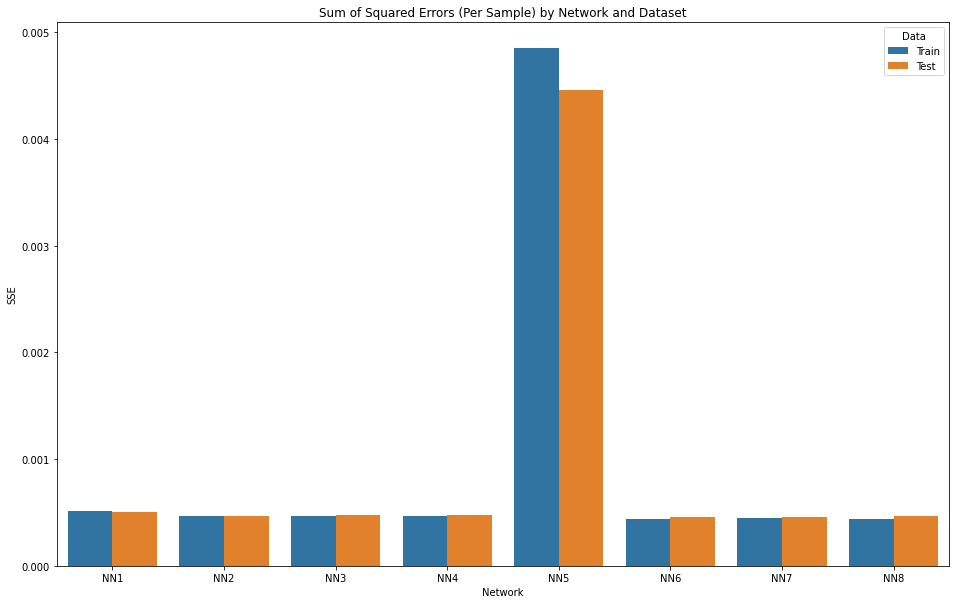

In [126]:
Regression_NN_Errors = pd.DataFrame({
    "Network": ["NN1", "NN1", "NN2", "NN2", "NN3", "NN3", "NN4", "NN4",
                "NN5", "NN5", "NN6", "NN6", "NN7", "NN7", "NN8", "NN8"],
    "Data": ["Train", "Test"] * 8,
    "SSE": [
        SSE_1_train / len(y_train), SSE_1_test / len(y_test),
        SSE_2_train / len(y_train), SSE_2_test / len(y_test),
        SSE_3_train / len(y_train), SSE_3_test / len(y_test),
        SSE_4_train / len(y_train), SSE_4_test / len(y_test),
        SSE_5_train / len(y_train), SSE_5_test / len(y_test),
        SSE_6_train / len(y_train), SSE_6_test / len(y_test),
        SSE_7_train / len(y_train), SSE_7_test / len(y_test),
        SSE_8_train / len(y_train), SSE_8_test / len(y_test)
    ]
})

sns.barplot(data=Regression_NN_Errors, x="Network", y="SSE", hue="Data")
plt.title("Sum of Squared Errors (Per Sample) by Network and Dataset")
plt.show()

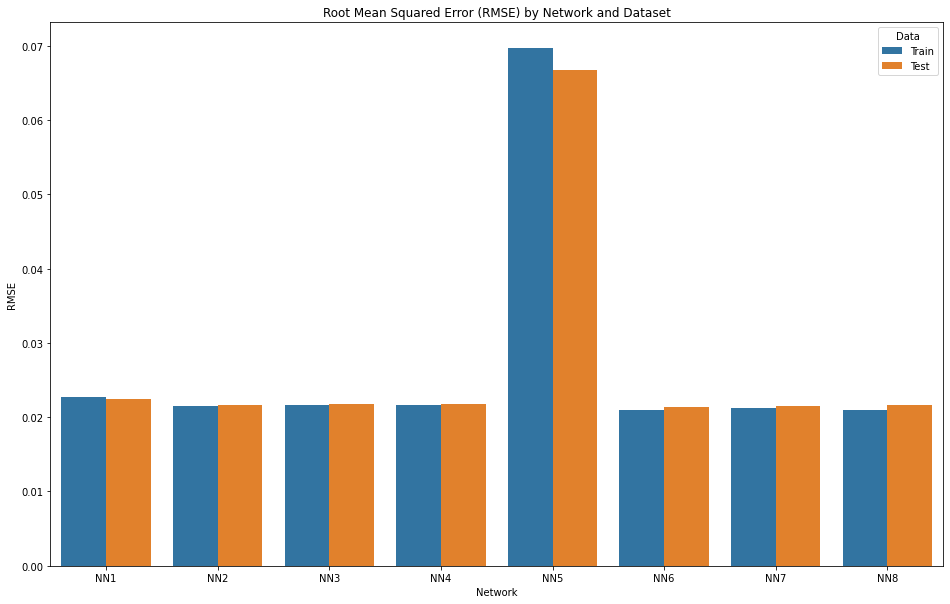

In [127]:
Regression_NN_Errors_RMSE = pd.DataFrame({
    "Network": ["NN1", "NN1", "NN2", "NN2", "NN3", "NN3", "NN4", "NN4",
                "NN5", "NN5", "NN6", "NN6", "NN7", "NN7", "NN8", "NN8"],
    "Data": ["Train", "Test"] * 8,
    "RMSE": [
        np.sqrt(SSE_1_train / len(y_train)), np.sqrt(SSE_1_test / len(y_test)),
        np.sqrt(SSE_2_train / len(y_train)), np.sqrt(SSE_2_test / len(y_test)),
        np.sqrt(SSE_3_train / len(y_train)), np.sqrt(SSE_3_test / len(y_test)),
        np.sqrt(SSE_4_train / len(y_train)), np.sqrt(SSE_4_test / len(y_test)),
        np.sqrt(SSE_5_train / len(y_train)), np.sqrt(SSE_5_test / len(y_test)),
        np.sqrt(SSE_6_train / len(y_train)), np.sqrt(SSE_6_test / len(y_test)),
        np.sqrt(SSE_7_train / len(y_train)), np.sqrt(SSE_7_test / len(y_test)),
        np.sqrt(SSE_8_train / len(y_train)), np.sqrt(SSE_8_test / len(y_test))
    ]
})

sns.barplot(data=Regression_NN_Errors_RMSE, x="Network", y="RMSE", hue="Data")
plt.title("Root Mean Squared Error (RMSE) by Network and Dataset")
plt.show()

## It is clear that fifth model is a washout. For the remaining ones, training errors are slightly lower except initial model. Since difference between training and test errors are not noticeably high, one may conclude that overfitting is not a problem for this case.

In [131]:
df_rmse = Regression_NN_Errors_RMSE.pivot(index="Network", columns="Data", values="RMSE")
df_sse  = Regression_NN_Errors.pivot(index="Network", columns="Data", values="SSE")

df_rmse.columns = ['RMSE_Train', 'RMSE_Test']
df_sse.columns  = ['SSE_Train',  'SSE_Test']

comparison_df = pd.concat([df_sse, df_rmse], axis=1)

comparison_df = comparison_df.sort_values(by='RMSE_Test')

comparison_df

,SSE_Train,SSE_Test,RMSE_Train,RMSE_Test
Network,,,,
NN8,0.000466,0.000437,0.021588,0.020904
NN6,0.000458,0.000442,0.021404,0.021014
NN7,0.000460,0.000448,0.021443,0.021176
NN2,0.000467,0.000465,0.021613,0.021559
NN3,0.000476,0.000469,0.021816,0.021652
NN4,0.000476,0.000469,0.021816,0.021652
NN1,0.000501,0.000514,0.022383,0.022679
NN5,0.004458,0.004853,0.066772,0.069664


## According to the plots above and error table, 8th model can be choosen as best model because it achieved lowest test SSE and RMSE. However, error results are close to each other with other models except 5th one. Then, if one prefers a simple architecture design, 6th and 7th models also may be useful.